In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import cv2
import glob
from PIL import Image
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [6]:

import numpy as np
import matplotlib.pyplot as plt
import keras
import pickle
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pandas as pd
import random

Using TensorFlow backend.


In [7]:
!unzip '/content/drive/My Drive/TrainIJCNN2013.zip'

Archive:  /content/drive/My Drive/TrainIJCNN2013.zip
replace TrainIJCNN2013/00000.ppm? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [8]:
path = 'TrainIJCNN2013'
for filename in glob.glob(path + '/*.txt'):
  print(filename)

TrainIJCNN2013/gt.txt
TrainIJCNN2013/ex.txt
TrainIJCNN2013/ReadMe.txt


In [0]:
f=open(path + "/gt.txt", "r")
contents = f.read()
gt = contents.split('\n')

In [0]:
data_x,data_y = [],[]

In [0]:
for i in range(len(gt)):
  data = gt[i].split(';')
  image_path = path + '/' + data[0]
  img = Image.open(image_path)
  img = np.asarray(img)
  xmin,ymin,xmax,ymax = [int(i) for i in data[1:5]]
  img = img[ymin:ymax,xmin:xmax]
  img = cv2.resize(img,(32,32))
  data_x.append(img)
  data_y.append(int(data[5]))

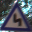

In [12]:
cv2_imshow(data_x[8])

In [0]:
for i in range(42):
  curr_pat = ''
  if(i < 10):
    curr_path = path + '/' + '0' + str(i)
  else:
    curr_path = path + '/'  + str(i)
  for image_path in glob.glob(curr_path + "/*.ppm"):
      img = Image.open(image_path)
      img = np.asarray(img)
      img = cv2.resize(img,(32,32))
#       cv2_imshow(img)
      data_x.append(img)
      data_y.append(i)


In [14]:
data_x = np.array(data_x)
data_y = np.array(data_y)
len(data_x),len(data_y)

(1698, 1698)

In [15]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [16]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
data

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [0]:
x_train,x_test,y_train,y_test = train_test_split(data_x,data_y,random_state = 0,test_size = 0.2)

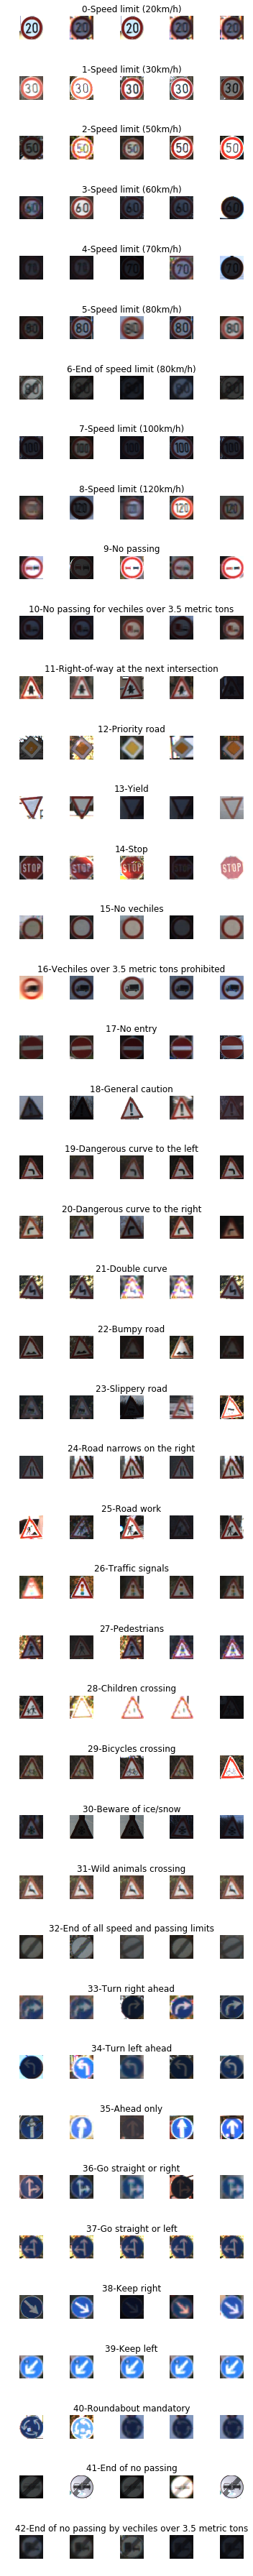

In [18]:
num_of_samples = []
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
        x_selected = x_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected)- 1),:, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + "-" + row['SignName'])
            num_of_samples.append(len(x_selected))

[7, 77, 94, 32, 48, 64, 28, 60, 75, 52, 101, 41, 86, 84, 34, 15, 13, 42, 48, 4, 14, 6, 13, 19, 3, 33, 18, 4, 16, 5, 22, 2, 6, 22, 14, 21, 11, 2, 89, 3, 13, 12, 5]


Text(0, 0.5, 'no of images')

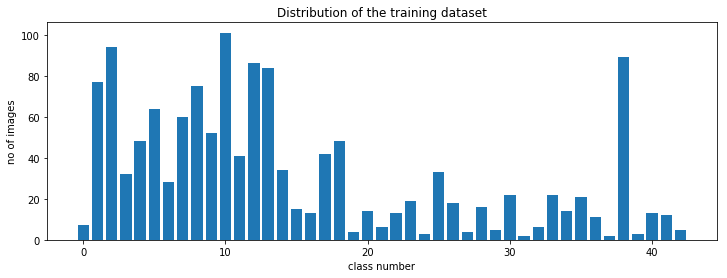

In [19]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("class number")
plt.ylabel("no of images")

In [0]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

(32, 32)


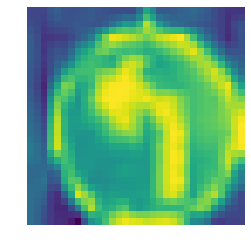

In [21]:
img = grayscale(x_train[1000])

plt.imshow(img)
plt.axis("off")
print(img.shape)

(32, 32)


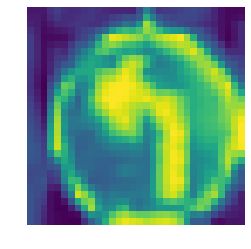

In [22]:
#to have similar lighting effect in background
def equalize(img):
    img = cv2.equalizeHist(img)
    return img# only grayscale images

img = equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)

In [0]:
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255 #normalizing the input
    return img

In [0]:
x_train = np.array(list(map(preprocessing, x_train)))
x_test = np.array(list(map(preprocessing, x_test)))

(1358, 32, 32)


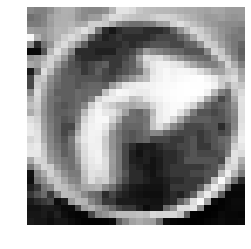

In [25]:
plt.imshow(x_train[random.randint(0,len(x_train)-1)],cmap = 'gray')
plt.axis("off")
print(x_train.shape)

In [0]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 1)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 1)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen  = ImageDataGenerator(width_shift_range = 0.1,
                             height_shift_range = 0.1,
                             zoom_range = 0.2,
                             shear_range = 0.1,
                             rotation_range = 10)
datagen.fit(x_train)

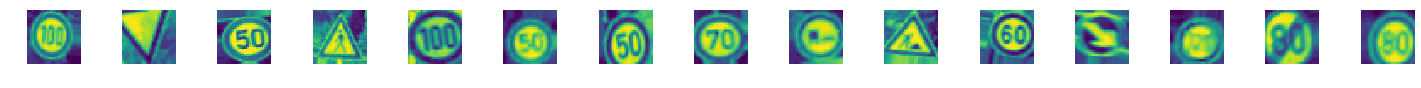

In [28]:
batches = datagen.flow(x_train, y_train, batch_size = 20)
x_batch, y_batch = next(batches)
fig, axs = plt.subplots(1, 15, figsize = (20,5))
fig.tight_layout()
for i in range(15):
  axs[i].imshow(x_batch[i].reshape(32,32))
  axs[i].axis("off")

In [0]:
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)

In [0]:
def model():
    model = Sequential()
    model.add(Conv2D(60, (5,5), input_shape = (32,32,1), activation = 'relu')) #no need to ad padding as our image is centralized
    model.add(Conv2D(60, (5,5), input_shape = (32,32,1), activation = 'relu')) #no need to ad padding as our image is centralized
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(30, (3,3), activation = 'relu'))
    model.add(Conv2D(30, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Dropout(0.5))

    
    model.add(Flatten()) # to convert 6*6*15 to 1D array
    model.add(Dense(500, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation = 'softmax'))
    
    model.compile(Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [31]:
model = model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_2 (MaxP

In [32]:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = 50), steps_per_epoch = 500, epochs = 10, validation_data = (x_test,y_test), shuffle = 1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
500/500 [==============================] - 11s 22ms/step - loss: 1.2891 - acc: 0.6376 - val_loss: 0.0950 - val_acc: 0.9824
Epoch 2/10
500/500 [==============================] - 8s 15ms/step - loss: 0.2929 - acc: 0.9079 - val_loss: 0.0640 - val_acc: 0.9853
Epoch 3/10
500/500 [==============================] - 8s 15ms/step - loss: 0.1822 - acc: 0.9415 - val_loss: 0.0370 - val_acc: 0.9941
Epoch 4/10
500/500 [==============================] - 8s 15ms/step - loss: 0.1308 - acc: 0.9582 - val_loss: 0.0256 - val_acc: 0.9912
Epoch 5/10
500/500 [==============================] - 8s 16ms/step - loss: 0.1041 - acc: 0.9678 - val_loss: 0.0201 - val_acc: 0.9971
Epoch 6/10
500/500 [==============================] - 9s 18ms/step - loss: 0.0841 - acc: 0.9734 - val_loss: 0.0150 - val_acc: 0.9971
Epoch 7/10
500/500 [==============================] - 8s 16ms/step - loss: 0.0724 - acc: 0.9763 - val_loss: 0.0293 - val_acc: 0.9941
Epoch 8/10
500/500 [

In [0]:
model.save('trained_model.h5')

Text(0.5, 0, 'epoch')

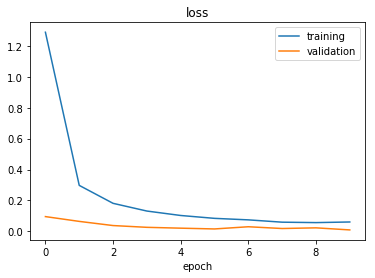

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

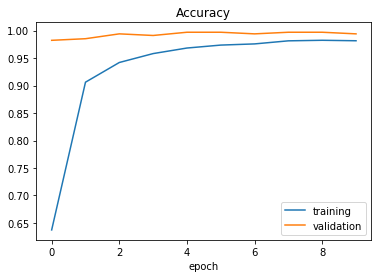

In [35]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [36]:
score = model.evaluate(x_test, y_test, verbose = 0)

print("Test score:", score[0])# loss 
print("Test Accuracy:", score[1])

Test score: 0.008759052256081144
Test Accuracy: 0.9941176463575924


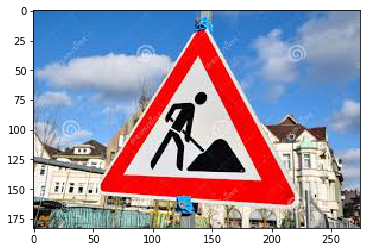

In [46]:
import requests
from PIL import Image
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSF1z49fQZWTqzOD2IXgs2ZheMMqA6UNALlGyHGvxFI96noXtVW'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


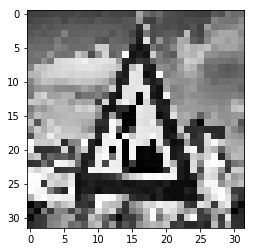

In [47]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [48]:
img = img.reshape(1, 32, 32, 1)
 

print("predicted sign index: "+ str(model.predict_classes(img)))
print("Predicted sign: " + data.iloc[model.predict_classes(img)[0]]['SignName'])

predicted sign index: [25]
Predicted sign: Road work
